In [1]:
#important libaries to import-
import pandas as pd  #pandas [useful for loading the dataset]-numpy[to perform array]
import numpy as np

In [2]:
!pip install scikit-learn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [13]:
from google.colab import files        #uploading data into online notebook salary_prediction_estimation
uploaded = files.upload()

Saving salary_prediction_estimation.csv to salary_prediction_estimation.csv


In [14]:
#to load the data
dataset = pd.read_csv('salary_prediction_estimation.csv')       
print(dataset)

     age  education.num  capital.gain  hours.per.week income
0     54              9             0              40  <=50k
1     39              9             0              22   >50k
2     38             10             0              29   >50k
3     29              4             0              19   >50k
4     19             10             0              29   >50k
..   ...            ...           ...             ...    ...
423   53              9             0              25  <=50k
424   25              5             0              23   >50k
425   23              5             0              35   >50k
426   35              6             0              45   >50k
427   45              7             0              22   >50k

[428 rows x 5 columns]


In [15]:
#summarize dataset  
print(dataset.shape)           #no. of rows and columns
print(dataset.head(5))      #head(5)-top 5 values & tail(5)-bottom 5 values 

(428, 5)
   age  education.num  capital.gain  hours.per.week income
0   54              9             0              40  <=50k
1   39              9             0              22   >50k
2   38             10             0              29   >50k
3   29              4             0              19   >50k
4   19             10             0              29   >50k


In [19]:
income_set = set(dataset['income'])
dataset['income'] = dataset['income'].map({'<=50k':0, '>50k': 1}).astype(int)
print(dataset.head(20))

    age  education.num  capital.gain  hours.per.week  income
0    54              9             0              40       0
1    39              9             0              22       1
2    38             10             0              29       1
3    29              4             0              19       1
4    19             10             0              29       1
5    29              9             0              20       1
6    20              6             0              30       1
7    30             16             0              34       0
8    34              9             0              34       0
9    34             10             0              55       0
10   55             16             0              35       1
11   35             15             0              53       1
12   53             13             0              25       1
13   25             10             0              23       1
14   23             19             0              35       1
15   35             11  

In [20]:
#segregate dataset into x and y - inputs/outputs-independent/dependent variables
X = dataset.iloc[:, :-1].values
X

array([[54,  9,  0, 40],
       [39,  9,  0, 22],
       [38, 10,  0, 29],
       ...,
       [23,  5,  0, 35],
       [35,  6,  0, 45],
       [45,  7,  0, 22]])

In [21]:
#segregate dataset into x and y - inputs/outputs-independent/dependent variables
y = dataset.iloc[:, -1].values
y

array([0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1,
       1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1,
       0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1,
       1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1,
       1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1,
       1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0,
       0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1,
       1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1,
       0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1,

In [22]:
#spiliting the dataset into train and test-x_train&y_train is for train purpose where x_test&y_test is for test purpose.
from sklearn.model_selection  import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.25, random_state = 0)

In [23]:
#feacture scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)
print(X_train)

[[-0.79611603 -0.05745706  0.         -0.27531365]
 [ 1.5535828   2.50417016  0.         -1.64618773]
 [-0.51415217 -0.05745706  0.          0.54721079]
 ...
 [-0.51415217  1.735682    0.          1.46112685]
 [ 1.08364304 -0.31361978  0.          1.09556043]
 [ 1.45959485  0.45486839  0.          0.18164437]]


Text(0, 0.5, 'Mean Error')

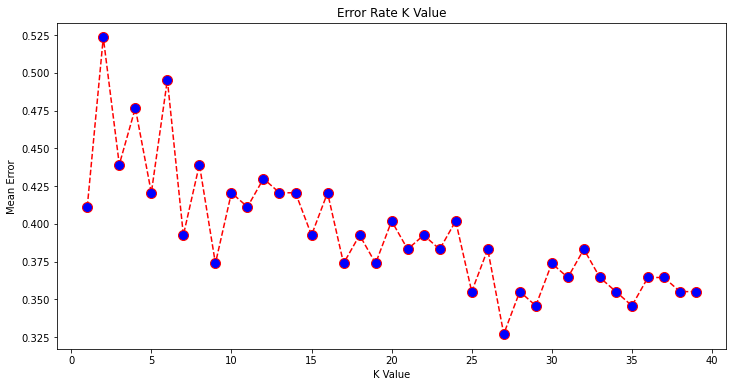

In [29]:
error = []

from sklearn.neighbors import KNeighborsClassifier #alg. 
import matplotlib.pyplot as plt    #Data Visualisation



# Calculating error for K values between 1 and 40

for i in range(1, 40):
  model = KNeighborsClassifier (n_neighbors=i) 
  model.fit(X_train, y_train) 
  pred_i = model.predict(X_test)
  error.append(np.mean(pred_i != y_test))
  
plt.figure(figsize=(12, 6))

plt.plot(range(1, 40), error, color='red', linestyle='dashed', marker='o',
         markerfacecolor="blue", markersize=10)

plt.title('Error Rate K Value')
plt.xlabel('K Value')
plt.ylabel('Mean Error')

In [30]:
#training 
from sklearn.neighbors import KNeighborsClassifier

model = KNeighborsClassifier(n_neighbors = 5,metric = 'minkowski', p = 2) 
model.fit(X_train, y_train)

KNeighborsClassifier()

In [31]:
#prediction for all the test data 
y_pred = model.predict(X_test)

In [32]:
#to get the accuracy of the model
from sklearn.metrics import confusion_matrix, accuracy_score
print("accuracy of the model:{0}%".format(accuracy_score(y_test,y_pred)*100))

accuracy of the model:57.943925233644855%


In [33]:
age = int(input("Enter New Employee's Age: "))
edu = int(input("Enter New Employee's Education: ")) 
cg = int(input("Enter New Employee's Captital Gain: "))
wh = int(input("Enter New Employee's Hour's Per week: "))

newEmp = [[age, edu, cg, wh]]

result = model.predict(sc.transform(newEmp))

print(result)

if result == 1:
  print("Employee might got Salary above 50K") 
else:
  print("Customer might not got Salary above 50K")

Enter New Employee's Age: 22
Enter New Employee's Education: 15
Enter New Employee's Captital Gain: 0
Enter New Employee's Hour's Per week: 60
[1]
Employee might got Salary above 50K
